In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import *
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

sb.set()
data = pd.read_csv("eda.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head(n=30)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.357290,2,110,80,1,1,0,0,1,0,21.967120
1,55.381246,1,140,90,3,1,0,0,1,1,34.927679
2,51.627652,1,130,70,3,1,0,0,0,1,23.507805
3,48.249144,2,150,100,1,1,0,0,1,1,28.710479
4,47.841205,1,100,60,1,1,0,0,0,0,23.011177
5,59.997262,1,120,80,2,2,0,0,0,0,29.384676
6,60.542094,1,130,80,3,1,0,0,1,0,37.729725
7,61.831622,2,130,90,3,3,0,0,1,1,29.983588
8,48.372348,1,110,70,1,1,0,0,1,0,28.440955
9,54.302533,1,110,60,1,1,0,0,0,0,25.282570


In [2]:
col1, col2 = data["bmi"], data["cardio"]
data = data.drop(["bmi", "cardio"], axis=1)
data = pd.concat([data, col1, col2], axis=1)
data.head(n=10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cardio
0,50.357290,2,110,80,1,1,0,0,1,21.967120,0
1,55.381246,1,140,90,3,1,0,0,1,34.927679,1
2,51.627652,1,130,70,3,1,0,0,0,23.507805,1
3,48.249144,2,150,100,1,1,0,0,1,28.710479,1
4,47.841205,1,100,60,1,1,0,0,0,23.011177,0
5,59.997262,1,120,80,2,2,0,0,0,29.384676,0
6,60.542094,1,130,80,3,1,0,0,1,37.729725,0
7,61.831622,2,130,90,3,3,0,0,1,29.983588,1
8,48.372348,1,110,70,1,1,0,0,1,28.440955,0
9,54.302533,1,110,60,1,1,0,0,0,25.282570,0


In [3]:
from sklearn.model_selection import train_test_split

X = data.drop([
    "cardio",
    # "alco",
    # "smoke",
    # "active", 
    # "age", 
    # "bmi", 
    # "gluc_Normal", 
    # "gluc_Well Above Normal", 
    # "gluc_Above Normal", 
    # "cholesterol_Above Normal", 
    # "cholesterol_Normal", 
    # "cholesterol_Well Above Normal",
    # "ap_hi"
], axis=1)


y = data.filter(["cardio"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
52223,40.134155,1,120,80,1,1,0,0,0,23.875115
27983,64.068446,1,130,80,1,1,0,0,1,27.639801
16179,49.399042,2,110,80,1,1,0,0,1,23.588329
50470,52.224504,1,150,80,1,1,0,0,1,24.835763
6056,62.086242,1,140,80,3,3,0,0,1,39.519741
...,...,...,...,...,...,...,...,...,...,...
37194,59.775496,1,120,79,1,2,0,0,0,23.875115
6265,50.223135,1,120,80,1,1,0,0,1,25.148605
54886,62.119097,2,120,80,1,1,0,0,1,25.909457
860,53.541410,2,130,90,3,1,0,0,1,29.411765


In [4]:
gbt = GradientBoostingClassifier(max_depth=6, n_estimators=36)
gbt.fit(X_train, y_train)
gbt.score(X_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7348792270531401

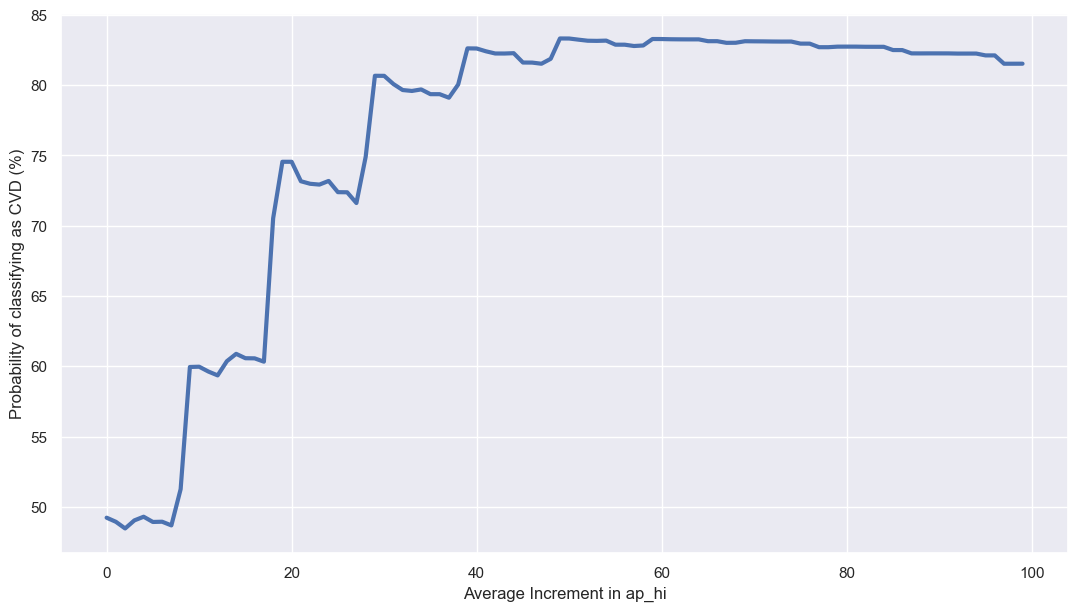

In [5]:
X_test_copied = X_test.copy()

y = []
x = range(100)

for shift in x:
    X_test["ap_hi"] += 1
    y.append(gbt.predict_proba(X_test) * 100)
    
y = [arr.T[1].mean() for arr in y]


f, ax = plt.subplots(1, 1, figsize=(13, 7))
ax.plot(x, y, linewidth=3)
ax.set_xlabel("Average Increment in ap_hi")
ax.set_ylabel("Probability of classifying as CVD (%)")

plt.show()


In [6]:
increments = []

for i in range(len(y)-1):
    increments.append(y[i+1] - y[i])

average_increment = np.array(increments).mean() 
average_increment

76.27764227401471

In [7]:

hue = [0 for _ in range(len(X_test_copied["ap_hi"]))]
hue += [1 for _ in range(len(X_test["ap_hi"]))]
cmp_aphi = pd.concat([X_test_copied["ap_hi"], X_test["ap_hi"]], ignore_index=True)
cmp_aphi = pd.concat([cmp_aphi, pd.DataFrame(data=hue, columns=["hue"])], axis=1)
cmp_aphi



,ap_hi,hue
0,120,0
1,130,0
2,110,0
3,140,0
4,150,0
...,...,...
41395,220,1
41396,240,1
41397,220,1
41398,210,1


<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

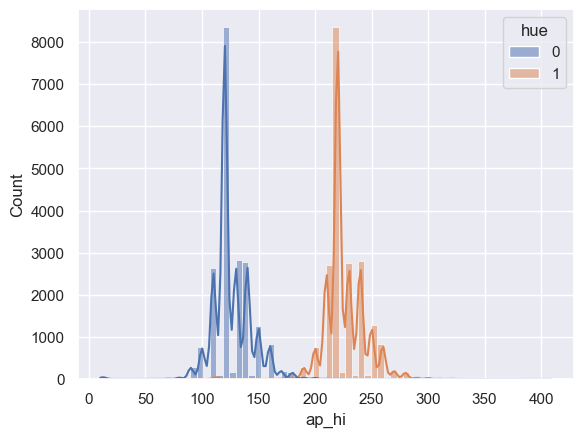

In [8]:
sb.histplot(data=cmp_aphi, x="ap_hi", hue="hue", kde=True)